# Setting things up

In [1]:
from general import *
from exp1 import *
import time
import pandas as pd
import multiprocessing as mp

random_state=42
np.random.seed(random_state)
cpu=mp.cpu_count() 
cpu

8

In [2]:
####
alpha=.1 #Significance level
iterations=48 #MC simulations to calculate type-1 error and power
ps=[10,30,50,70] #Z dim
m=800 #Training set size
n=200 #Test set size
B=100 #Number of permutations/samplings (RESIT,CRT,CPT)
npar = 7 #Number of different values for parameters like gamma, theta, c etc.
nbas = 20 #Number of different generative configurations (different pairs (a,b))

####
skews = [0,1]
losses = ['mse']

In [3]:
alpha=.05 #Significance level
iterations=48 #MC simulations to calculate type-1 error and power
ps=[10,20,30] #Z dim
m=800 #Training set size
n=200 #Test set size
B=100 #Number of permutations/samplings (RESIT,CRT,CPT)
npar = 7 #Number of different values for parameters like gamma, theta, c etc.
nbas = 20 #Number of different generative configurations (different pairs (a,b))

####
skews = [0]
losses = ['mse']

# Experiments

In [3]:
results = {'set':[], 'p':[],
           'ba':[], 'c':[], 'theta':[], 'skew':[], 'gamma':[], 'loss':[],
           'stfr':[], 'resit':[], 'gcm':[], 'crt':[], 'cpt':[],'rbpt':[], 'rbpt2':[],
           'stfr_time':[], 'resit_time':[], 'gcm_time':[], 'crt_time':[], 'cpt_time':[], 'rbpt_time':[], 'rbpt2_time':[]}

count=0

for p in ps:
    
    bas = [[np.random.normal(0, 1, p).reshape(p,1), np.random.normal(0, 1, p).reshape(p,1)] for j in range(nbas)]
    
    for ba in tqdm(bas):
        # Parameters a and b
        b = ba[0]
        a = ba[1]

        for skew in skews:
            for loss in losses:

                #### Type I error ####
                c = 0

                #STFR,RESIT,GCM,RBPT,RBPT2#
                tests={'stfr':True, 'resit':True, 'gcm':True, 'crt':False, 'cpt':False, 'rbpt':True, 'rbpt2':True}
                theta=0
                gammas = np.linspace(0,.02,npar)
                for gamma in gammas:
                    # Running
                    pool = mp.Pool(cpu)
                    out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                    pool.close()
                    out = np.array(out).mean(axis=0)

                    # Storing results
                    results['set'].append('type1_1'); results['p'].append(p)
                    results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                    results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
                    results['stfr_time'].append(out[7]); results['resit_time'].append(out[8]); results['gcm_time'].append(out[9]); results['crt_time'].append(out[10]); results['cpt_time'].append(out[11]); results['rbpt_time'].append(out[12]); results['rbpt2_time'].append(out[13])

                #CRT,CPT,RBPT#
                tests={'stfr':False, 'resit':False, 'gcm':False, 'crt':True, 'cpt':True,'rbpt':True, 'rbpt2':True}
                thetas = np.linspace(0,6,npar)
                gamma = 0
                for theta in thetas:
                    # Running
                    pool = mp.Pool(cpu)
                    out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                    pool.close()
                    out = np.array(out).mean(axis=0)

                    # Storing results
                    results['set'].append('type1_2'); results['p'].append(p)
                    results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                    results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
                    results['stfr_time'].append(out[7]); results['resit_time'].append(out[8]); results['gcm_time'].append(out[9]); results['crt_time'].append(out[10]); results['cpt_time'].append(out[11]); results['rbpt_time'].append(out[12]); results['rbpt2_time'].append(out[13])

                #### Power ####
                tests={'stfr':False, 'resit':False, 'gcm':False, 'crt':False, 'cpt':True, 'rbpt':True, 'rbpt2':True}
                cs = np.linspace(0,.4,npar)
                theta = 0
                gamma = 0
                for c in cs:
                    # Running
                    pool = mp.Pool(cpu)
                    out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B, tests) for it in range(iterations)])
                    pool.close()
                    out = np.array(out).mean(axis=0)

                    # Storing results
                    results['set'].append('power'); results['p'].append(p)
                    results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                    results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
                    results['stfr_time'].append(out[7]); results['resit_time'].append(out[8]); results['gcm_time'].append(out[9]); results['crt_time'].append(out[10]); results['cpt_time'].append(out[11]); results['rbpt_time'].append(out[12]); results['rbpt2_time'].append(out[13])

        # Update 'count'
        count+=1

100%|██████████| 10/10 [23:34<00:00, 141.42s/it]


## Saving results

In [4]:
results = pd.DataFrame(results)
results.to_csv('results/artificial_data_experiments.csv')

In [4]:
results = pd.read_csv('results/artificial_data_experiments.csv')

In [158]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.4   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

### Plots
def plot_type1(results, sett, skew, loss, alpha=.05, xlabel='x', ylabel='y', legend=True):
    ####
    
    if '1_1' in sett: 
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
        names = ['RBPT', 'RBPT2','STFR','RESIT','GCM'] 
    else: 
        colors = ['#1f77b4', '#8c564b', '#e377c2']
        names=['RBPT', 'CRT', 'CPT']
        
    ####
    columns_by = ['set','c','theta','skew','gamma','loss']
    results_mean = results.groupby(by=columns_by).mean().reset_index()
    results_std = results.groupby(by=columns_by).std().reset_index()
    
    ####
    ind_row = (results_mean.set==sett)&(results_mean.loss==loss)&(results_mean['skew']==skew)
    ind_col=[s.lower() for s in names]
    if '1_1' in sett: x = np.array(results_mean.loc[ind_row].gamma)
    else: x = np.array(results_mean.loc[ind_row].theta)
    results_mean = np.array(results_mean.loc[ind_row,ind_col])
    results_std = np.array(results_std.loc[ind_row,ind_col])
    
    ####
    for j in range(len(names)):
        plt.plot(x, results_mean[:,j], label=names[j], color=colors[j], lw=1, alpha=1)
        plt.fill_between(x, results_mean[:,j]-results_std[:,j], results_mean[:,j]+results_std[:,j], color=colors[j], alpha=.15)
    
    if legend:
        if '1_1' in sett: plt.legend(bbox_to_anchor=(.51, .8), loc='upper left', ncol = 1, prop={'size': 10}, borderaxespad=.0, frameon=True, framealpha=.5)                
        else: plt.legend(bbox_to_anchor=(.0225, .97), loc='upper left', ncol = 1, prop={'size': 10}, borderaxespad=.0, frameon=True, framealpha=.5)                
    plt.axhline(y=alpha, color='r', linestyle='--', lw=1, alpha=.5)
    plt.xticks(fontsize=12)
    plt.xlabel(xlabel, size=15)

    plt.yticks(fontsize=12)
    plt.ylabel(ylabel, size=15)
    plt.ylim(0,1)
    #plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True, useOffset=False))
    if '1_1' in sett: 
        plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%1.2f'))
    plt.grid(alpha=.2)
    
def plot_power(results, skew, loss, alpha=.05, xlabel='x', ylabel='y', legend=True):
    
    ####
    sett='power'
    colors=['#1f77b4', '#ff7f0e', '#e377c2'] 
    names=['RBPT', 'RBPT2','CPT']
    columns_by = ['set','c','theta','skew','gamma','loss']
    results_mean = results.groupby(by=columns_by).mean().reset_index()
    results_std = results.groupby(by=columns_by).std().reset_index()
    ind_row = (results_mean.set==sett)&(results_mean.loss==loss)&(results_mean['skew']==skew)
    ind_col=[s.lower() for s in names]
    x = np.array(results_mean.loc[ind_row].c)
    results_mean = np.array(results_mean.loc[ind_row,ind_col])
    results_std = np.array(results_std.loc[ind_row,ind_col])
    for j in range(len(names)):
        plt.plot(x, results_mean[:,j], label=names[j], color=colors[j], lw=1, alpha=1)
        plt.fill_between(x, results_mean[:,j]-results_std[:,j], results_mean[:,j]+results_std[:,j], color=colors[j], alpha=.15)
    
    if legend:
        plt.legend(bbox_to_anchor=(.0225, .97), loc='upper left', ncol = 1, prop={'size': 11}, borderaxespad=.0, frameon=True, framealpha=.5)                
    plt.axhline(y=alpha, color='r', linestyle='--', lw=1, alpha=.5)
    plt.xticks(fontsize=12)
    plt.xlabel(xlabel, size=15)
    plt.yticks(fontsize=12)
    plt.ylabel(ylabel, size=15)
    plt.ylim(0,1)
    #plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%1.2f'))
    plt.grid(alpha=.2)


************************ p=10, skew=0, loss=mse ************************


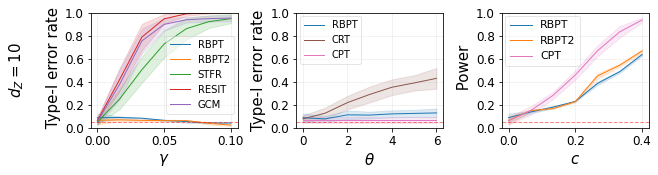


************************ p=20, skew=0, loss=mse ************************


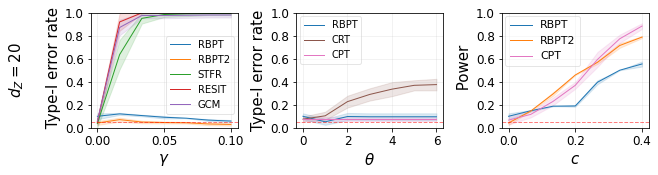


************************ p=30, skew=0, loss=mse ************************


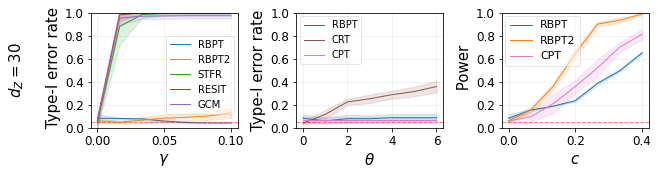

In [159]:
for p in ps:
    
    results_p = results.loc[results.p==p]
    
    for skew in skews:
        
        for loss in losses:
            print("\n************************ p={:}, skew={:}, loss={:} ************************".format(p, skew, loss))
            
            ###
            plt.figure(figsize=(10,2))
            plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
            plt.subplot(1, 3, 1)
            plot_type1(results_p, sett='type1_1', skew=skew, loss=loss, alpha=alpha, xlabel='$\gamma$', ylabel='$d_Z=${:}\n\n Type-I error rate'.format(p), legend=True)
            plt.subplot(1, 3, 2)
            plot_type1(results_p, sett='type1_2', skew=skew, loss=loss, alpha=alpha, xlabel='$\\theta$', ylabel='Type-I error rate', legend=True)
            plt.subplot(1, 3, 3)
            plot_power(results_p, skew=skew, loss=loss, alpha=alpha, xlabel='$c$', ylabel=' \n Power'.format(p), legend=True)
            plt.savefig('plots/exp1_{:}_{:}_{:}.png'.format(p, str(skew), loss), bbox_inches='tight', dpi=300, transparent=True)
            plt.show()